In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations

In [44]:
df_precios = pd.read_csv('activos_limpios.csv')

In [33]:
df_precios['Unnamed: 0'] = pd.to_datetime(df_precios['Unnamed: 0'] )
df_precios.set_index('Unnamed: 0', inplace=True)


<Axes: xlabel='Unnamed: 0'>

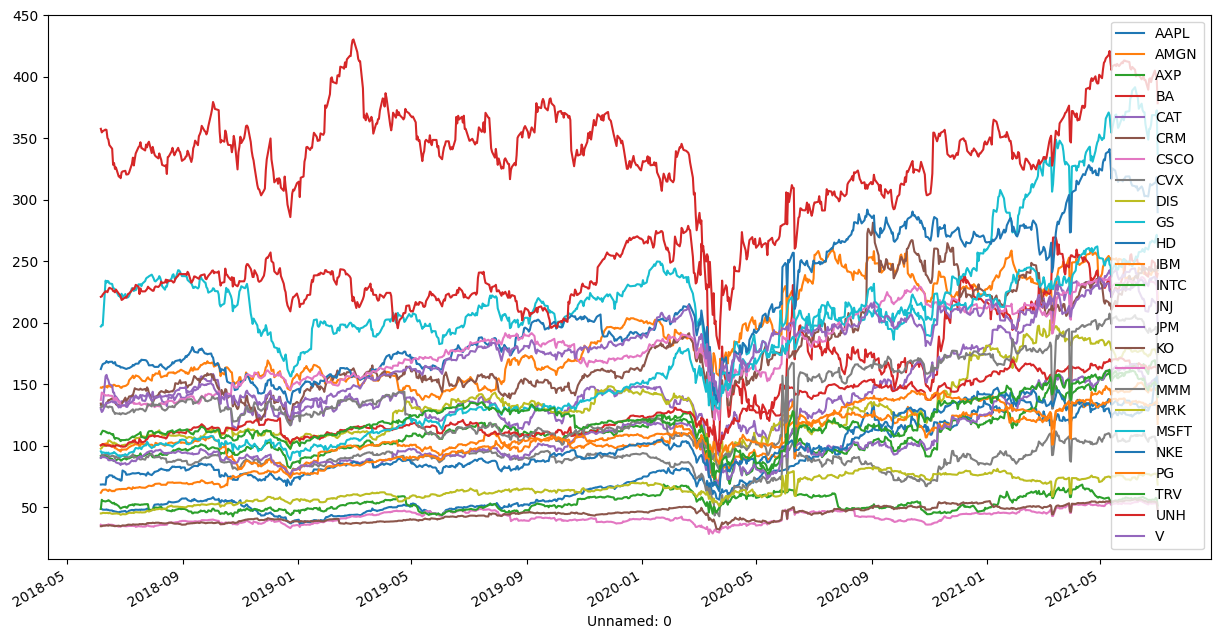

In [34]:
df_precios.plot(figsize=(15,8))

In [35]:
def calcular_metrics(df, freq_anual=252, rf=0.0):
    """
    Calcula rentabilidad, volatilidad, ratios de Sharpe, Sortino y drawdown máximo.
    
    Parámetros:
        df (DataFrame): precios ajustados, columnas=activos, index=fechas
        freq_anual (int): número de periodos al año para anualizar
        rf (float): rentabilidad libre de riesgo (diaria)
    
    Retorna:
        resumen (DataFrame): cada fila = un activo, columnas = métricas completas
    """
    resumen = pd.DataFrame(index=df.columns)
    
    # Rentabilidad diaria y log
    rent_simple = df.pct_change().dropna()
    rent_log = np.log(df / df.shift(1)).dropna()
    
    #Rentabilidad media diaria y anual
    resumen["Rentabilidad media diaria"] = rent_simple.mean()
    resumen["Rentabilidad media anual"] = rent_simple.mean() * freq_anual
    
    #Volatilidad diaria y anual
    resumen["Volatilidad diaria"] = rent_simple.std()
    resumen["Volatilidad anual"] = rent_simple.std() * np.sqrt(freq_anual)
    
    #Sharpe ratio anualizado (suponiendo rf diario = 0)
    resumen["Sharpe ratio"] = (resumen["Rentabilidad media anual"] - rf*freq_anual) / resumen["Volatilidad anual"]
    
    #Sortino ratio anualizado
    downside_std = rent_simple[rent_simple < 0].std()  # desviación solo de rendimientos negativos
    resumen["Sortino ratio"] = (resumen["Rentabilidad media anual"] - rf*freq_anual) / (downside_std * np.sqrt(freq_anual))
    
    #Drawdown máximo
    max_dd = {}
    for col in df.columns:
        precio_cum_max = df[col].cummax()
        dd = (df[col] / precio_cum_max) - 1
        max_dd[col] = dd.min()
    resumen["Drawdown máximo"] = pd.Series(max_dd)
    
    return resumen


In [36]:
df_metrics = calcular_metrics(df_precios)
df_metrics

,Rentabilidad media diaria,Rentabilidad media anual,Volatilidad diaria,Volatilidad anual,Sharpe ratio,Sortino ratio,Drawdown máximo
AAPL,0.001507,0.379660,0.021385,0.339469,1.118392,1.467091,-0.383931
AMGN,0.000743,0.187229,0.023079,0.366370,0.511039,0.667028,-0.245338
AXP,0.001016,0.256110,0.025713,0.408184,0.627439,0.835168,-0.496385
BA,0.000134,0.033794,0.035476,0.563157,0.060008,0.077545,-0.779201
CAT,0.000778,0.196104,0.023266,0.369335,0.530964,0.731129,-0.419463
CRM,0.001026,0.258571,0.023977,0.380616,0.679349,0.938862,-0.357158
CSCO,0.000633,0.159508,0.023818,0.378101,0.421868,0.520129,-0.419511
CVX,0.000489,0.123107,0.031828,0.505260,0.243651,0.302607,-0.557739
DIS,0.000948,0.238781,0.020971,0.332907,0.717261,0.985990,-0.431062
GS,0.000975,0.245669,0.024603,0.390556,0.629024,0.848538,-0.459535


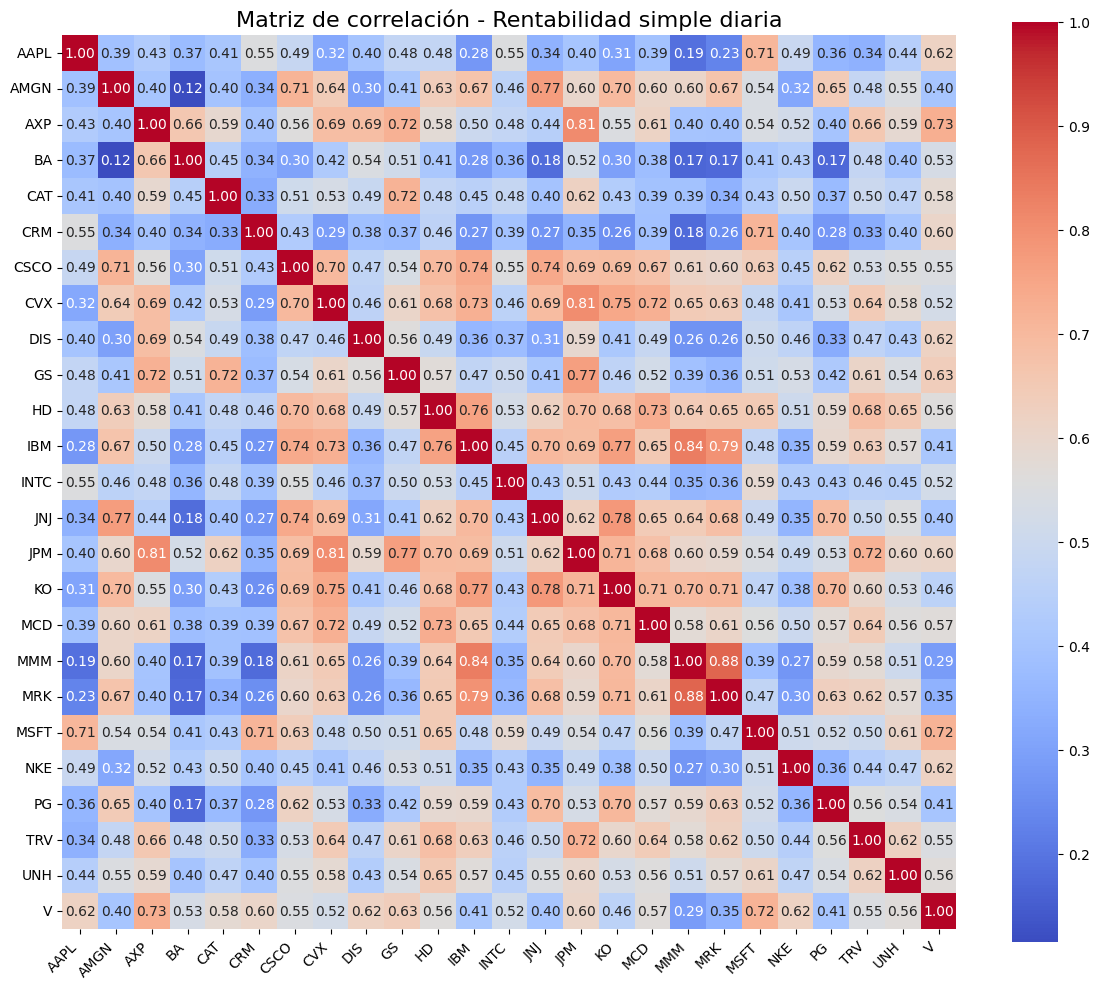

In [37]:
rent_simple = df_precios.pct_change()

# Matriz de correlación
corr_matrix = rent_simple.corr()

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de correlación - Rentabilidad simple diaria", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:

def seleccionar_y_graficar_cartera(df_precios, resumen_metrics, top_sharpe_percent=0.5, ventana_vol=21):
    """
    Selecciona 3 activos siguiendo la estrategia y genera gráficos:
    - Riesgo vs rentabilidad
    - Evolución del precio
    - Evolución de rentabilidad diaria
    - Evolución de volatilidad móvil
    
    Parámetros:
        df_precios (DataFrame): precios ajustados
        resumen_metrics (DataFrame): métricas de los activos
        top_sharpe_percent (float): porcentaje top de activos por Sharpe ratio
        ventana_vol (int): ventana en días para volatilidad móvil
        
    Retorna:
        activos_seleccionados, metrics_cartera
    """
    # ====== Selección de activos ======
    n_top = int(len(resumen_metrics) * top_sharpe_percent)
    top_activos = resumen_metrics.sort_values(by="Sharpe ratio", ascending=False).head(n_top).index.tolist()
    
    rent_simple = df_precios[top_activos].pct_change().dropna()
    corr_matrix = rent_simple.corr()
    
    mejores_combinaciones = []
    for trio in combinations(top_activos, 3):
        corr_12 = corr_matrix.loc[trio[0], trio[1]]
        corr_13 = (corr_matrix.loc[trio[0], trio[2]] + corr_matrix.loc[trio[1], trio[2]]) / 2
        mejores_combinaciones.append({
            "trio": trio,
            "corr_12": corr_12,
            "corr_13": corr_13,
            "score": -corr_12 + abs(0.5 - corr_13)
        })
    
    mejores_combinaciones = sorted(mejores_combinaciones, key=lambda x: x["score"], reverse=True)
    activos_seleccionados = mejores_combinaciones[0]["trio"]
    
    # ====== Métricas de la cartera ponderada igual ======
    pesos = np.array([1/3, 1/3, 1/3])
    rent_cartera = rent_simple[list(activos_seleccionados)].dot(pesos)
    rent_media_anual = rent_cartera.mean() * 252
    vol_anual = rent_cartera.std() * np.sqrt(252)
    sharpe_cartera = rent_media_anual / vol_anual
    metrics_cartera = pd.DataFrame({
        "Rentabilidad media anual": [rent_media_anual],
        "Volatilidad anual": [vol_anual],
        "Sharpe ratio": [sharpe_cartera]
    }, index=["Cartera"])
    
    # ====== Gráfico 1: Riesgo vs rentabilidad ======
    plt.figure(figsize=(12,8))
    plt.scatter(resumen_metrics["Volatilidad anual"], resumen_metrics["Rentabilidad media anual"], 
                c=resumen_metrics["Sharpe ratio"], cmap="viridis", s=100, alpha=0.7, label="Activos")
    
    for activo in activos_seleccionados:
        plt.scatter(resumen_metrics.loc[activo, "Volatilidad anual"], 
                    resumen_metrics.loc[activo, "Rentabilidad media anual"], 
                    color="red", s=150, edgecolors="black", label=f"Seleccionado: {activo}")
    
    plt.scatter(metrics_cartera["Volatilidad anual"], metrics_cartera["Rentabilidad media anual"], 
                color="black", s=200, marker="*", label="Cartera (ponderada)")
    plt.xlabel("Volatilidad anual")
    plt.ylabel("Rentabilidad anual")
    plt.title("Riesgo vs Rentabilidad - Activos y Cartera", fontsize=16)
    plt.colorbar(label="Sharpe ratio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # ====== Gráfico 2: Evolución del precio ======
    df_precios[list(activos_seleccionados)].plot(figsize=(12,6), title="Evolución del precio de los activos seleccionados")
    plt.xlabel("Fecha")
    plt.ylabel("Precio ajustado")
    plt.grid(True)
    plt.show()
    
    # ====== Gráfico 3: Evolución de la rentabilidad diaria ======
    rent_diaria = df_precios[list(activos_seleccionados)].pct_change().dropna()
    rent_diaria.plot(figsize=(12,6), title="Rentabilidad diaria de los activos seleccionados")
    plt.xlabel("Fecha")
    plt.ylabel("Rentabilidad diaria")
    plt.grid(True)
    plt.show()
    
    # ====== Gráfico 4: Volatilidad móvil ======
    vol_movil = rent_diaria.rolling(ventana_vol).std()
    vol_movil.plot(figsize=(12,6), title=f"Volatilidad móvil ({ventana_vol} días) de los activos seleccionados")
    plt.xlabel("Fecha")
    plt.ylabel("Volatilidad")
    plt.grid(True)
    plt.show()
    
    return activos_seleccionados, metrics_cartera

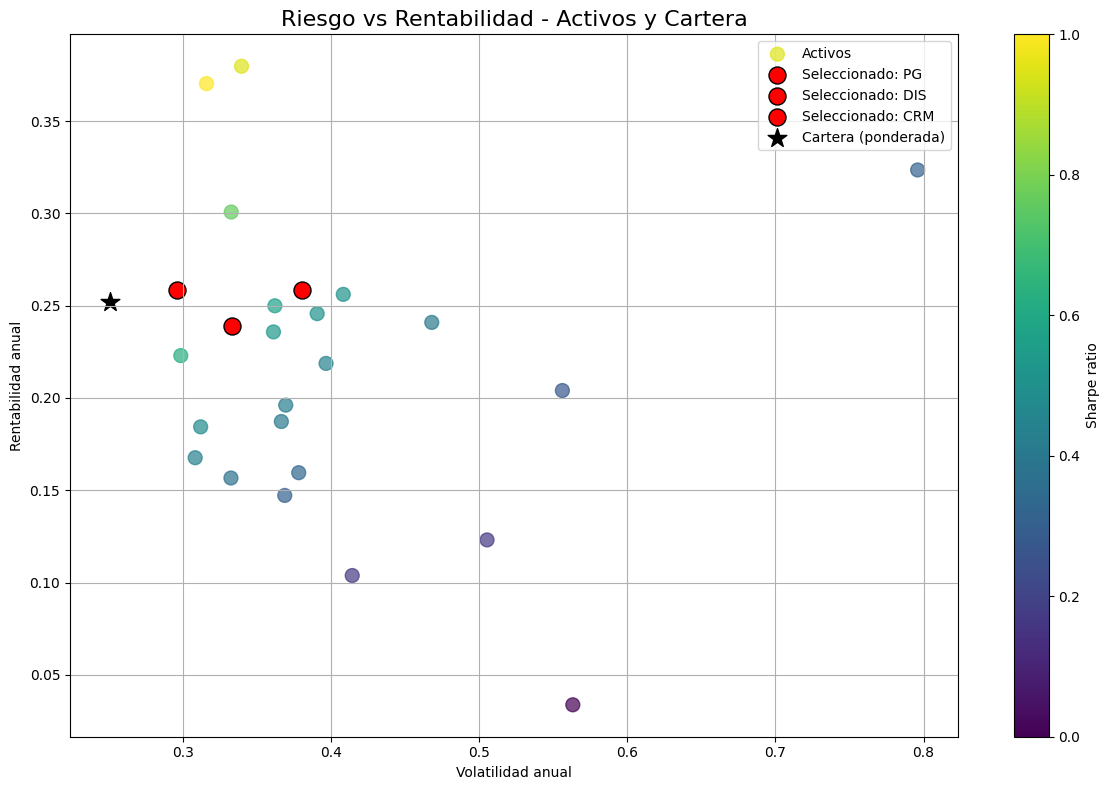

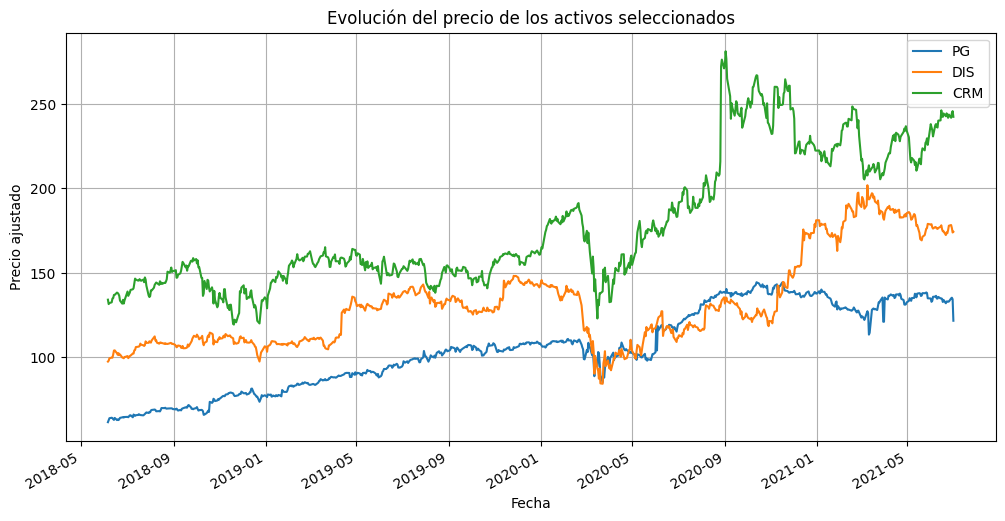

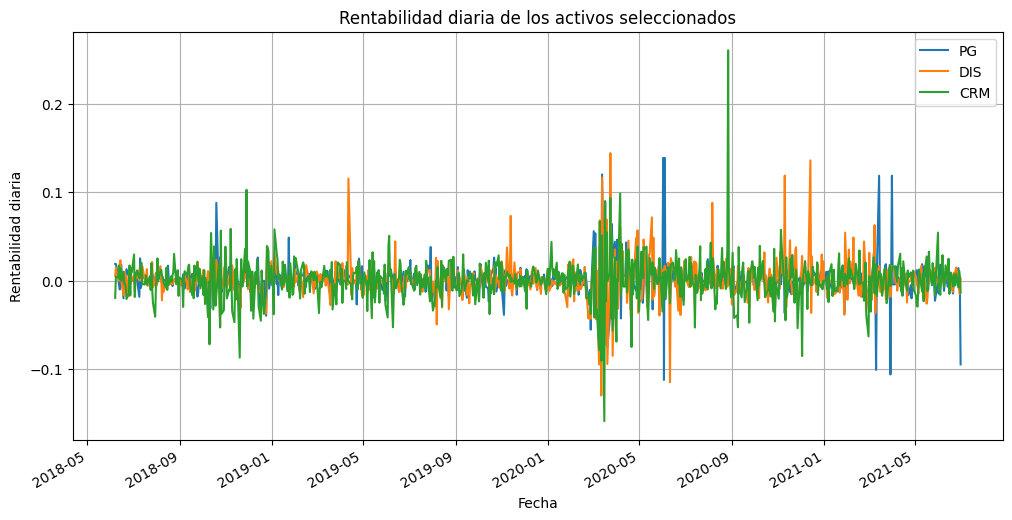

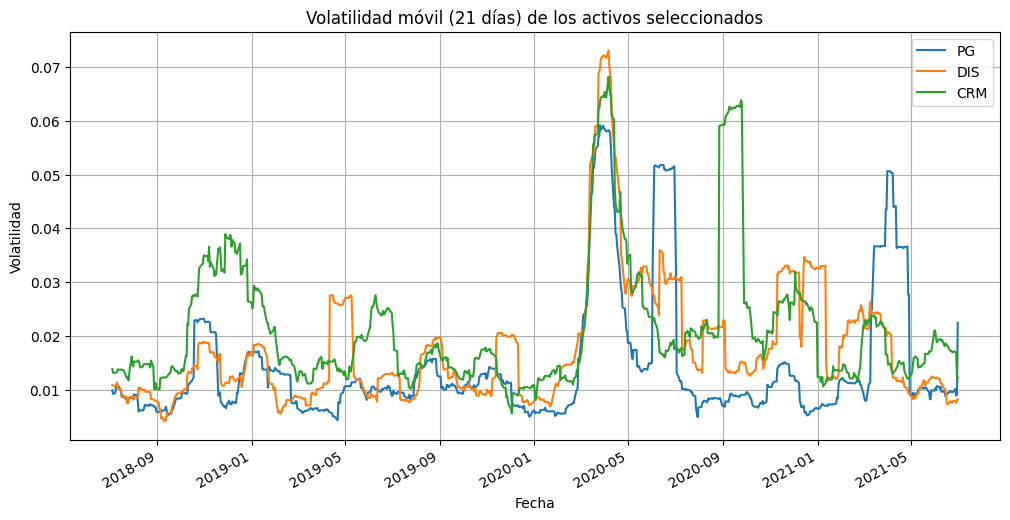

(('PG', 'DIS', 'CRM'),
          Rentabilidad media anual  Volatilidad anual  Sharpe ratio
 Cartera                  0.251983           0.250948      1.004128)

In [39]:
seleccionar_y_graficar_cartera(df_precios, df_metrics)

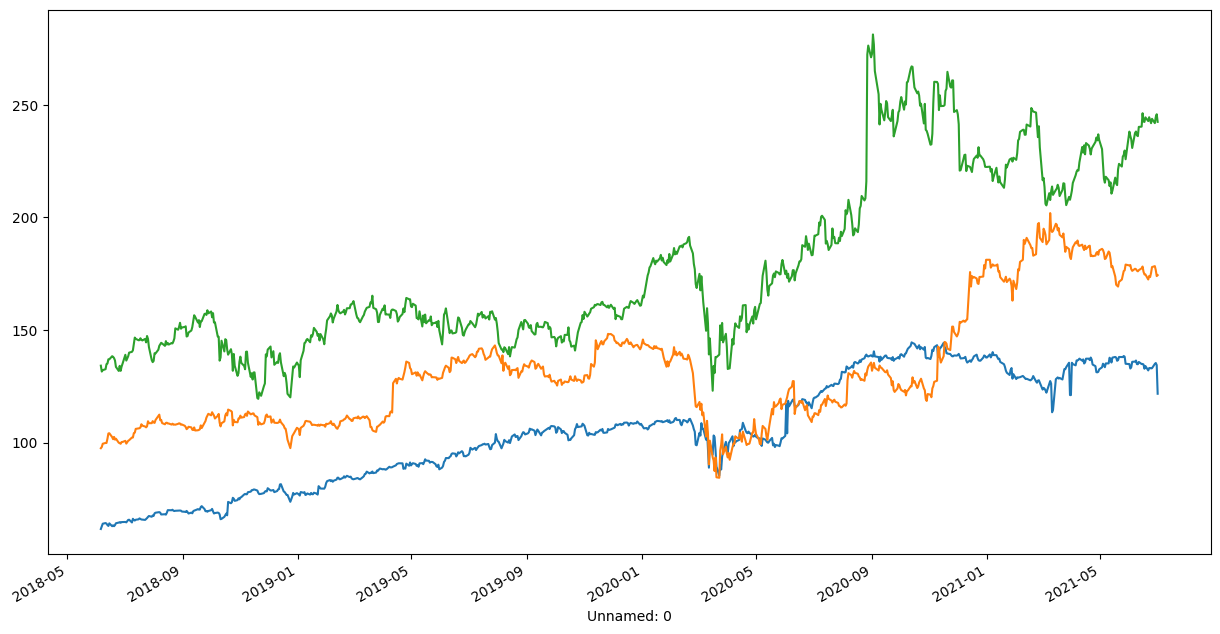

In [40]:
tickers = ['PG', 'DIS', 'CRM']
for ticker in tickers:
    serie = df_precios[ticker]
    serie.plot(figsize = (15,8))


--- Descomposición de la serie: PG ---



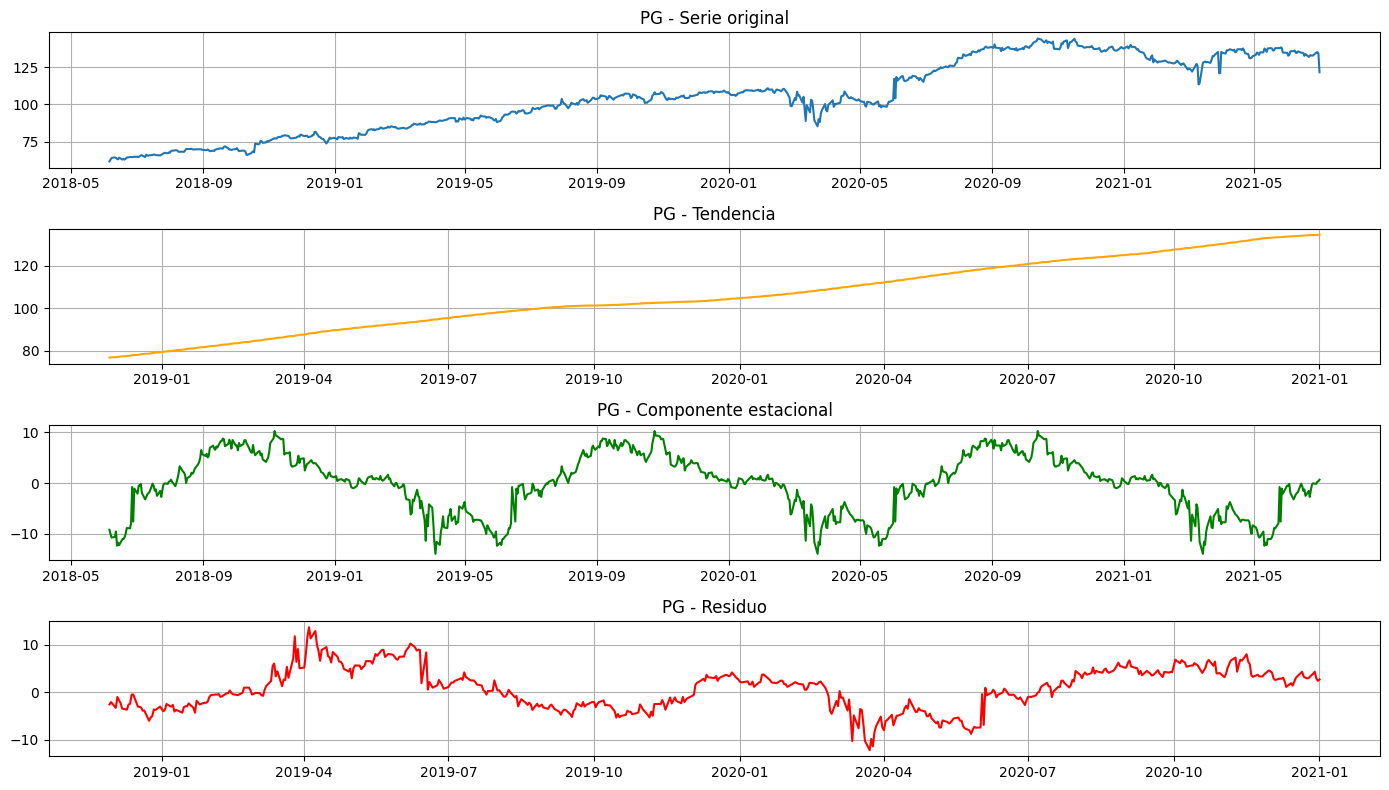


--- Descomposición de la serie: DIS ---



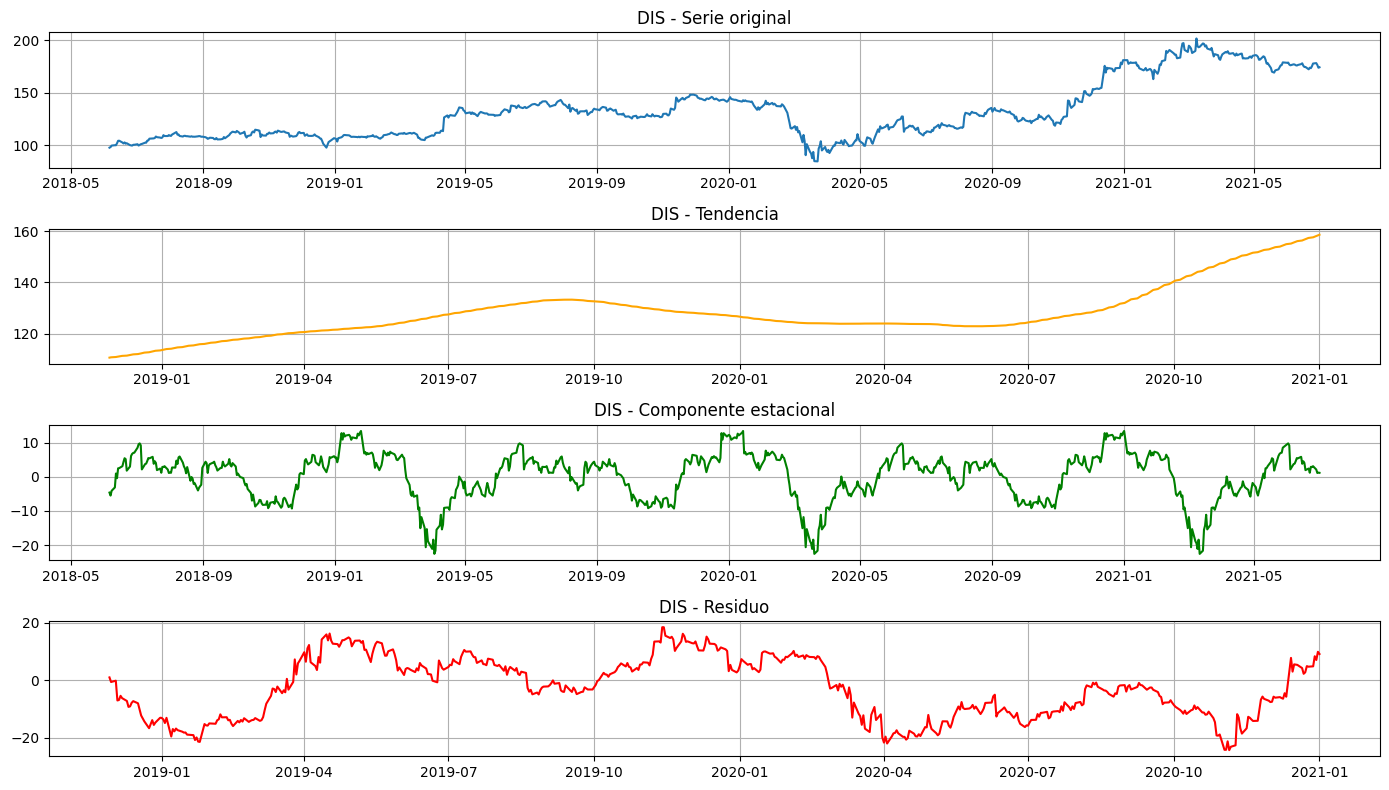


--- Descomposición de la serie: CRM ---



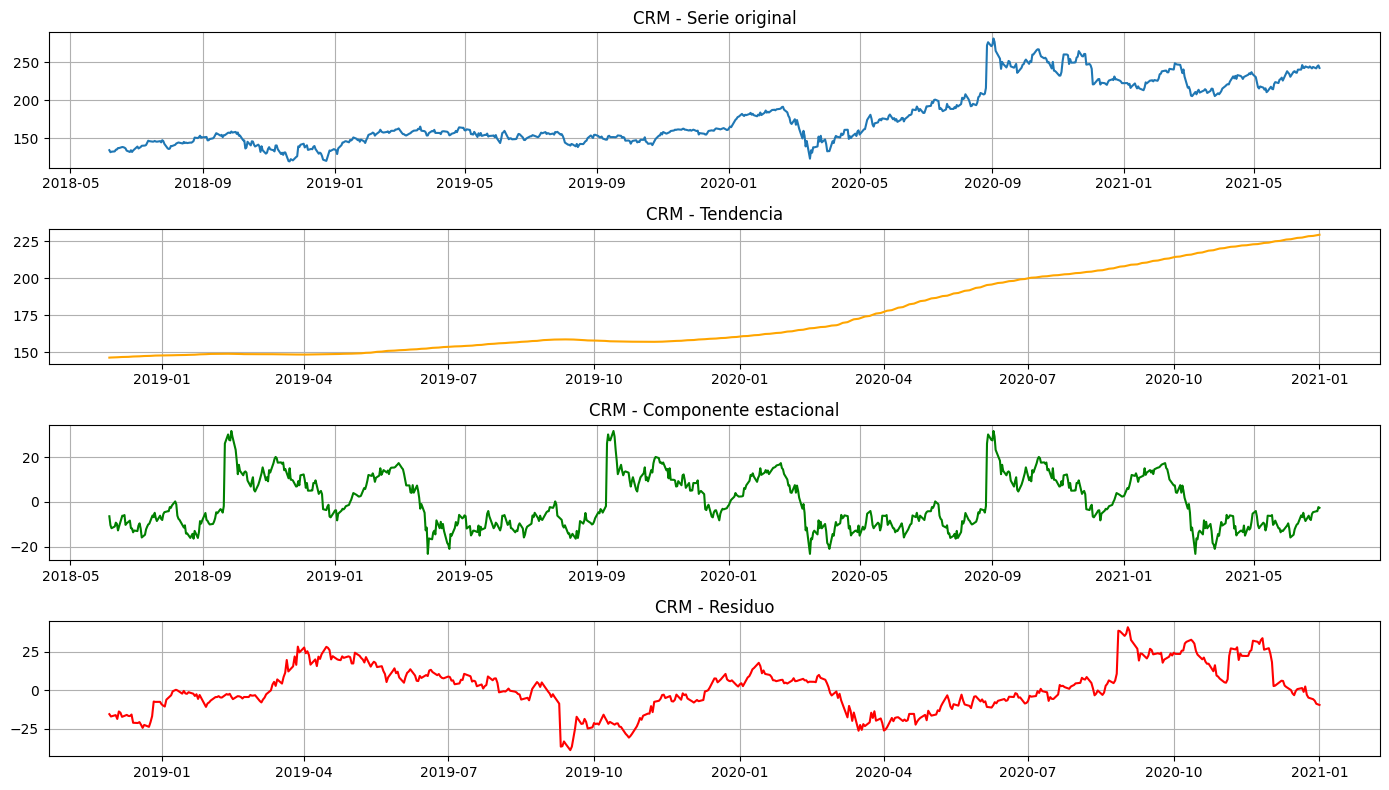

In [41]:

from statsmodels.tsa.seasonal import seasonal_decompose
# Descomposición para cada activo
for ticker in tickers:
    print(f"\n--- Descomposición de la serie: {ticker} ---\n")
    
    # Tomamos la serie temporal de precios ajustados
    serie = df_precios[ticker].dropna()
    
    # Descomposición clásica aditiva (suponiendo datos diarios, periodo=252 días ~ 1 año)
    decomposition = seasonal_decompose(serie, model='additive', period=252)
    
    # Componentes
    tendencia = decomposition.trend
    estacional = decomposition.seasonal
    residuo = decomposition.resid
    
    # Graficamos la descomposición
    plt.figure(figsize=(14,8))
    
    plt.subplot(4,1,1)
    plt.plot(serie, label='Precio ajustado')
    plt.title(f'{ticker} - Serie original')
    plt.grid(True)
    
    plt.subplot(4,1,2)
    plt.plot(tendencia, color='orange', label='Tendencia')
    plt.title(f'{ticker} - Tendencia')
    plt.grid(True)
    
    plt.subplot(4,1,3)
    plt.plot(estacional, color='green', label='Estacionalidad')
    plt.title(f'{ticker} - Componente estacional')
    plt.grid(True)
    
    plt.subplot(4,1,4)
    plt.plot(residuo, color='red', label='Residuo')
    plt.title(f'{ticker} - Residuo')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


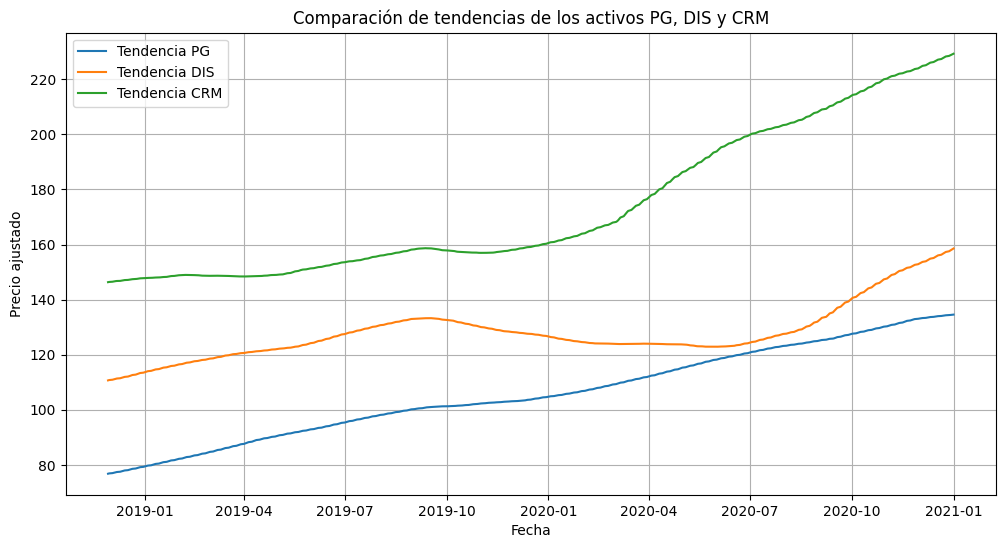

<Figure size 1000x400 with 0 Axes>

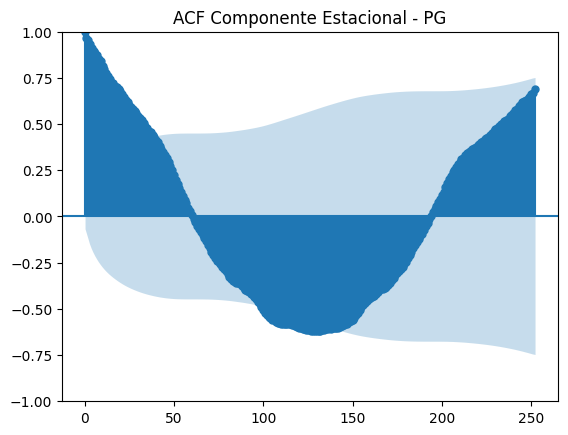

<Figure size 1000x400 with 0 Axes>

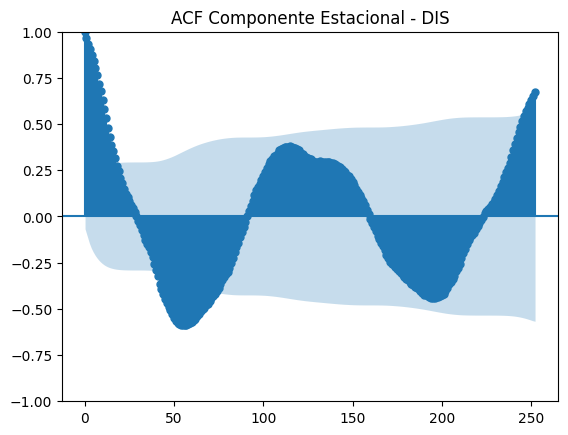

<Figure size 1000x400 with 0 Axes>

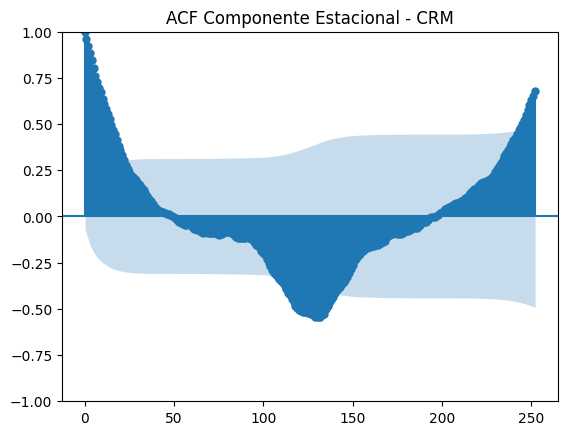

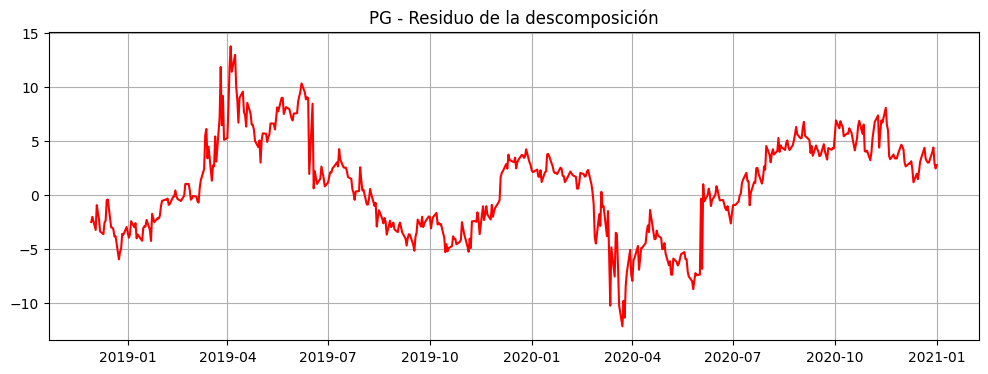


--- Análisis del residuo: PG ---
Estacionariedad final: No estacionaria (heterocedasticidad significativa)
Heterocedasticidad (ARCH) p-value: 0.0000


C:\Users\martt\AppData\Local\Temp\ipykernel_11616\547772604.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(residuo_clean, regression='c')[1]


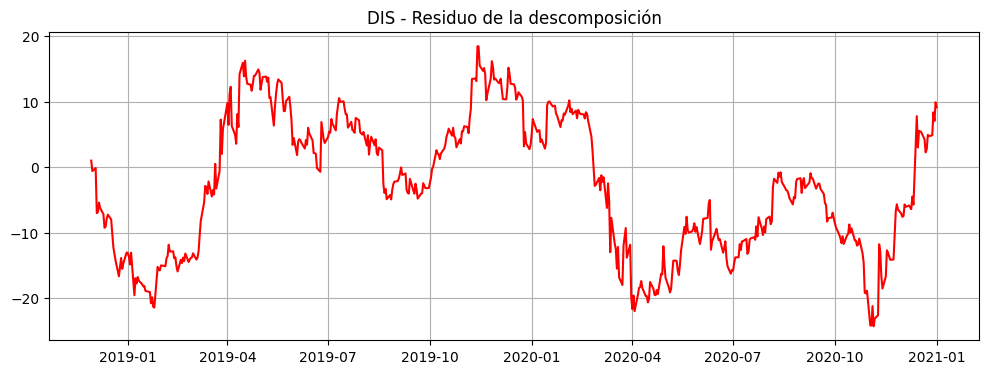


--- Análisis del residuo: DIS ---
Estacionariedad final: No estacionaria (heterocedasticidad significativa)
Heterocedasticidad (ARCH) p-value: 0.0000


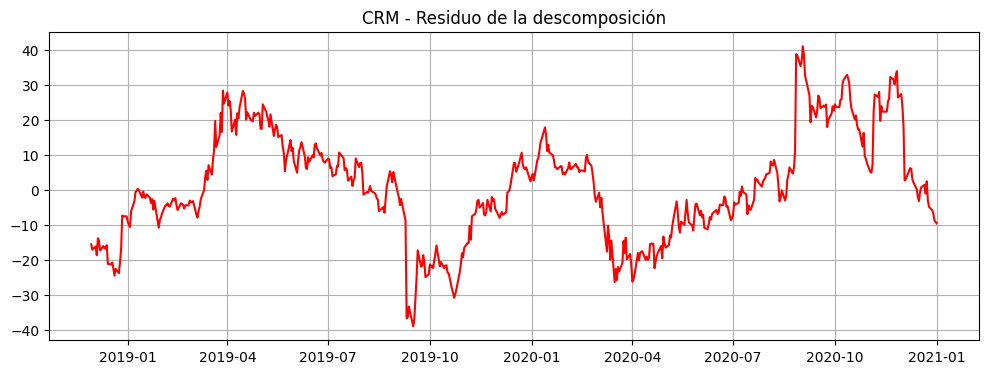


--- Análisis del residuo: CRM ---
Estacionariedad final: No estacionaria (heterocedasticidad significativa)
Heterocedasticidad (ARCH) p-value: 0.0000

Resumen final de residuos de los activos:
                                 Estacionariedad final p-value ARCH
PG   No estacionaria (heterocedasticidad significat...          0.0
DIS  No estacionaria (heterocedasticidad significat...          0.0
CRM  No estacionaria (heterocedasticidad significat...          0.0


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_arch

# Tickers de la cartera
tickers = ['PG', 'DIS', 'CRM']

# Función para análisis final del residuo considerando heterocedasticidad como criterio decisivo
def analizar_residuo_final(residuo, ticker):
    residuo_clean = residuo.dropna()
    
    # ===== Test de estacionariedad =====
    adf_p = adfuller(residuo_clean)[1]
    kpss_p = kpss(residuo_clean, regression='c')[1]
    
    # ===== Test de heterocedasticidad ARCH =====
    arch_p = het_arch(residuo_clean)[1]
    
    # Diagnóstico final
    if arch_p < 0.05:
        estacionariedad_final = "No estacionaria (heterocedasticidad significativa)"
    else:
        # Si no hay heterocedasticidad, usamos ADF/KPSS combinados
        if adf_p < 0.05 and kpss_p > 0.05:
            estacionariedad_final = "Estacionaria"
        elif adf_p >= 0.05 and kpss_p <= 0.05:
            estacionariedad_final = "No estacionaria"
        else:
            estacionariedad_final = "Indeterminado"
    
    # Mostrar resultados
    print(f"\n--- Análisis del residuo: {ticker} ---")
    print(f"Estacionariedad final: {estacionariedad_final}")
    print(f"Heterocedasticidad (ARCH) p-value: {arch_p:.4f}")
    
    return estacionariedad_final, arch_p

# ===== Paso 1: Descomposición sin plotear =====
decompositions = {}
for ticker in tickers:
    serie = df_precios[ticker].dropna()
    decomposition = seasonal_decompose(serie, model='additive', period=252)
    decompositions[ticker] = decomposition

# ===== Paso 2: Comparación de tendencias =====
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(decompositions[ticker].trend, label=f'Tendencia {ticker}')
plt.title('Comparación de tendencias de los activos PG, DIS y CRM')
plt.xlabel('Fecha')
plt.ylabel('Precio ajustado')
plt.grid(True)
plt.legend()
plt.show()

# ===== Paso 3: Análisis de estacionalidad con ACF =====
for ticker in tickers:
    estacional = decompositions[ticker].seasonal.dropna()
    plt.figure(figsize=(10,4))
    plot_acf(estacional, lags=252, title=f'ACF Componente Estacional - {ticker}')
    plt.show()

# ===== Paso 4: Análisis del residuo con resultado claro =====
residuos_resultados = {}
for ticker in tickers:
    residuo = decompositions[ticker].resid
    
    # Graficar residuo
    plt.figure(figsize=(12,4))
    plt.plot(residuo, color='red')
    plt.title(f'{ticker} - Residuo de la descomposición')
    plt.grid(True)
    plt.show()
    
    # Análisis final considerando heterocedasticidad
    estacionariedad_final, arch_p = analizar_residuo_final(residuo, ticker)
    residuos_resultados[ticker] = {
        "Estacionariedad final": estacionariedad_final,
        "p-value ARCH": arch_p
    }

# ===== Resultados resumidos =====
residuos_df = pd.DataFrame(residuos_resultados).T
print("\nResumen final de residuos de los activos:")
print(residuos_df)


In [20]:
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_arch

# Selección de los activos
activos = ['PG', 'DIS', 'CRM']

# Transformar a log-retornos diarios
log_retornos = np.log(df_precios[activos] / df_precios[activos].shift(1)).dropna()

# Función de diagnóstico final de estacionariedad con heterocedasticidad
def diagnostico_final(serie, ticker):
    serie_clean = serie.dropna()
    
    # Test de estacionariedad
    adf_p = adfuller(serie_clean)[1]
    kpss_p = kpss(serie_clean, regression='c')[1]
    
    # Test de heterocedasticidad
    arch_p = het_arch(serie_clean)[1]
    
    # Diagnóstico final considerando heterocedasticidad
    if arch_p < 0.05:
        estacionariedad_final = "No estacionaria (heterocedasticidad significativa)"
    else:
        if adf_p < 0.05 and kpss_p > 0.05:
            estacionariedad_final = "Estacionaria"
        elif adf_p >= 0.05 and kpss_p <= 0.05:
            estacionariedad_final = "No estacionaria"
        else:
            estacionariedad_final = "Indeterminado"
    
    print(f"\n--- Diagnóstico log-retornos: {ticker} ---")
    print(f"Estacionariedad final: {estacionariedad_final}")
    print(f"p-value ARCH: {arch_p:.4f}")
    
    return estacionariedad_final, arch_p

# Verificar estacionariedad de los log-retornos
diagnosticos = {}
for ticker in activos:
    est, arch_p = diagnostico_final(log_retornos[ticker], ticker)
    diagnosticos[ticker] = {"Estacionariedad final": est, "p-value ARCH": arch_p}

# Resumen
diagnosticos_df = pd.DataFrame(diagnosticos).T
print("\nResumen final de log-retornos estacionarios:")
print(diagnosticos_df)



--- Diagnóstico log-retornos: PG ---
Estacionariedad final: No estacionaria (heterocedasticidad significativa)
p-value ARCH: 0.0000

--- Diagnóstico log-retornos: DIS ---
Estacionariedad final: No estacionaria (heterocedasticidad significativa)
p-value ARCH: 0.0000

--- Diagnóstico log-retornos: CRM ---
Estacionariedad final: No estacionaria (heterocedasticidad significativa)
p-value ARCH: 0.0024

Resumen final de log-retornos estacionarios:
                                 Estacionariedad final p-value ARCH
PG   No estacionaria (heterocedasticidad significat...          0.0
DIS  No estacionaria (heterocedasticidad significat...          0.0
CRM  No estacionaria (heterocedasticidad significat...      0.00241


C:\Users\martt\AppData\Local\Temp\ipykernel_11616\641344516.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(serie_clean, regression='c')[1]
C:\Users\martt\AppData\Local\Temp\ipykernel_11616\641344516.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(serie_clean, regression='c')[1]
C:\Users\martt\AppData\Local\Temp\ipykernel_11616\641344516.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(serie_clean, regression='c')[1]


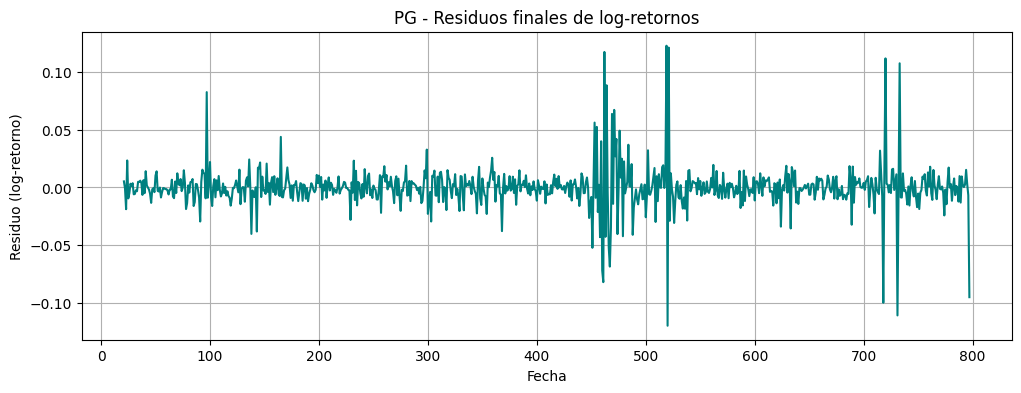

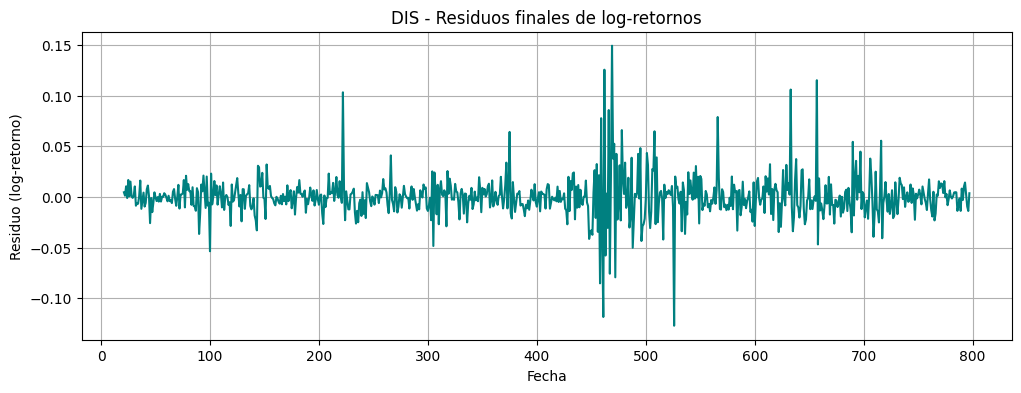

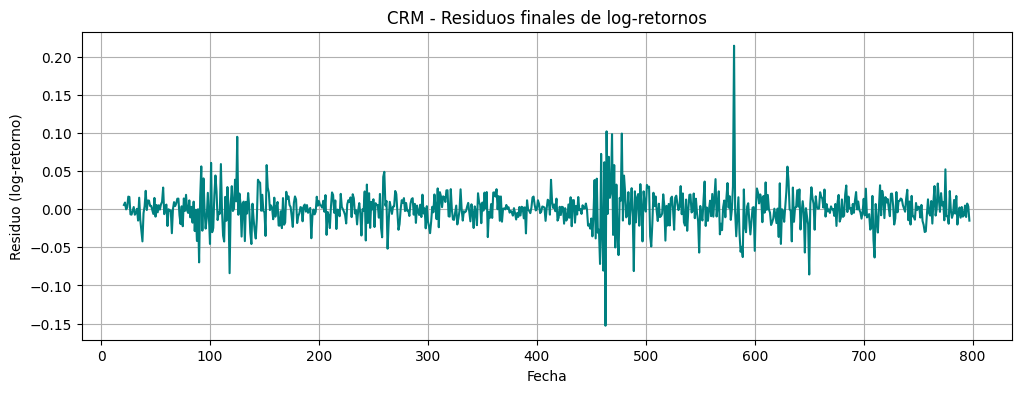

In [43]:
# Para suavizar y visualizar la tendencia residual podemos usar un rolling mean
ventana = 21  # 1 mes aprox. de trading

for ticker in activos:
    serie = log_retornos[ticker]
    
    # Residuo final: log-retorno menos media móvil (tendencia corta)
    residuo_final = serie - serie.rolling(window=ventana).mean()
    
    plt.figure(figsize=(12,4))
    plt.plot(residuo_final, color='teal')
    plt.title(f'{ticker} - Residuos finales de log-retornos')
    plt.xlabel('Fecha')
    plt.ylabel('Residuo (log-retorno)')
    plt.grid(True)
    plt.show()
